In [1]:
# Importando librerias

import pandas as pd #Dataframes
import numpy as np #Manejar arreglos numericos 
import matplotlib.pyplot as plt #Graficas
import seaborn as sns #Graficar
from wordcloud import WordCloud #Generar nubes de palabras
from PIL import Image #Importacion y manejo de imagenes (Generar nubes de palabras)

In [2]:
#Configuraciones Iniciales Para que en las consultas se muestren todos los datos
pd.options.display.max_rows=None
pd.options.display.max_columns=None
pd.options.display.width=None
pd.options.display.max_colwidth=None

## Importando data

In [3]:
data = pd.read_excel("Ordenes de compra.xlsx")

C:\Users\Arley\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [4]:
data.head(3) #Ver primeros regstros

,COMPROBANTE,FECHA,NIT,NOMBRE,CENTRO DE COSTOS,PRODUCTO,DESCRIPCION,CANTIDAD,VALOR TOTAL
0,Y-001-00000017851,2020-01-10,900567277,NUTRIENDOTE SAS,VICERRECTORIA ACADEMICA,001-0011-000035,REFRIGERIOS VARIOS,14.0,42000.0
1,Y-001-00000017851,2020-01-10,900567277,NUTRIENDOTE SAS,VICERRECTORIA ACADEMICA,001-0011-000035,REFRIGERIOS VARIOS,14.0,42000.0
2,Y-001-00000017852,2020-01-10,901005409,KLEUR IMPRESORES SAS,VICERRECTORIA DE INVESTIGACION,001-0003-000476,CARTILLAS DE MATEMATICAS,1500.0,18150000.0


In [5]:
data.shape #Ver el tamaño del Dataframe

(9772, 9)

## Cambiando los nombres de las columnas

In [6]:
data.columns #Obtener los nombres de las columnas

Index(['COMPROBANTE      ', 'FECHA     ', 'NIT          ',
       'NOMBRE                                  ', 'CENTRO DE COSTOS',
       'PRODUCTO       ', 'DESCRIPCION                                       ',
       'CANTIDAD       ', 'VALOR TOTAL    '],
      dtype='object')

In [7]:
#Cambiando los nombres de las columnas, tienen espacios al final de cada nombre
data.columns = ['COMPROBANTE', 'FECHA', 'NIT',
       'NOMBRE', 'CENTRO DE COSTOS','PRODUCTO',
       'DESCRIPCION', 'CANTIDAD',
       'VALOR TOTAL']

In [8]:
data.info()

#Conclusiones 
#Atributos (Columnas) numericos no se estan tomando como tal ("CANTIDAD", "VALOR TOTAL")
#En "NOMBRES" hay un registro vacio y uno con valor 1
#Se eliminaron dos registros con VALOR TOTAL = "TRAMPAS"
#Se elimino registro con "NOMBRE" = "Total Fila" (Fecha Ingreso Vacia)

#NOTA: ALGUNAS OPERACIONES SE REALIZARON DESDE EXCEL EN EL ARCHIVO FUENTE
#A CONTINUACION SE MUESTRAN LOS TIPOS DE DATOS, CADA COLUMNA ESTA EN EL FORMATO ADECUADO LUEGO DE LAS OPERACIONES ANTERIORES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9772 entries, 0 to 9771
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   COMPROBANTE       9772 non-null   object        
 1   FECHA             9772 non-null   datetime64[ns]
 2   NIT               9772 non-null   int64         
 3   NOMBRE            9772 non-null   object        
 4   CENTRO DE COSTOS  9772 non-null   object        
 5   PRODUCTO          9772 non-null   object        
 6   DESCRIPCION       9772 non-null   object        
 7   CANTIDAD          9772 non-null   float64       
 8   VALOR TOTAL       9772 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 687.2+ KB


--------------

## Eliminando registros con informacion Faltante()

In [9]:
data = data.dropna() #Elimina los registros con informacion faltante
data.shape

(9772, 9)

--------------

## Explorando los datos únicos por columnas

In [10]:
data.columns #Mostrando el nombre de todas las columnas

Index(['COMPROBANTE', 'FECHA', 'NIT', 'NOMBRE', 'CENTRO DE COSTOS', 'PRODUCTO',
       'DESCRIPCION', 'CANTIDAD', 'VALOR TOTAL'],
      dtype='object')

In [11]:
#len(data["COMPROBANTE"].unique())   # 2862 Valores (Hacer Top mas representativos)
#len(data["FECHA"].value_counts())   # 569 Valores (Hacer Top mas representativos)
#data["NIT"].value_counts()    # 667 Valores (Hacer Top mas representativos)
#data["NOMBRE"].value_counts() # 665 Valores (Hacer Top mas representativos)
#data["CENTRO DE COSTOS"].unique() # 52 Valores (Hacer Top mas representativos)
#data["SCC"].value_counts()     # 56 Valores (Hacer Top mas representativos)
#data["SC"].value_counts()      # 117 Valores (Hacer Top mas representativos)
#len(data["PRODUCTO"].value_counts())# 2125 Valores (Hacer Top mas representativos)
#len(data["DESCRIPCION"].value_counts()) # 2124 Valores (Hacer Top mas representativos)
#len(data["CANTIDAD"].value_counts())    # 320 Valores (Hacer Top mas representativos)
#len(data["VALOR TOTAL"].value_counts())  # 4623 Valores (Hacer Top mas representativos)


---------

## Creando columnas de Año y mes para manejo mas simple en graficas

In [12]:
data['AÑO'] = data['FECHA'].dt.year
data['MES'] = data['FECHA'].dt.month 
data.head(2)

,COMPROBANTE,FECHA,NIT,NOMBRE,CENTRO DE COSTOS,PRODUCTO,DESCRIPCION,CANTIDAD,VALOR TOTAL,AÑO,MES
0,Y-001-00000017851,2020-01-10,900567277,NUTRIENDOTE SAS,VICERRECTORIA ACADEMICA,001-0011-000035,REFRIGERIOS VARIOS,14.0,42000.0,2020,1
1,Y-001-00000017851,2020-01-10,900567277,NUTRIENDOTE SAS,VICERRECTORIA ACADEMICA,001-0011-000035,REFRIGERIOS VARIOS,14.0,42000.0,2020,1


In [13]:
## Cambiando la posición de las columnas de Año y Mes
data = data[['COMPROBANTE', 'FECHA', "AÑO","MES" ,'NIT',
       'NOMBRE', 'CENTRO DE COSTOS', 'PRODUCTO',
       'DESCRIPCION', 'CANTIDAD',
       'VALOR TOTAL']]
data.sample(3) #Muestra registros aleatorios

,COMPROBANTE,FECHA,AÑO,MES,NIT,NOMBRE,CENTRO DE COSTOS,PRODUCTO,DESCRIPCION,CANTIDAD,VALOR TOTAL
8190,Y-001-00000020153,2022-08-11,2022,8,900127133,AUROS QUIMICOS LIMITADA,UNIDAD ACADEMICA CIENCIAS BASICAS,001-0004-000018,PAPEL FILTRO,7.0,203000.0
4866,Y-001-00000019271,2021-11-09,2021,11,52739725,LEAL AYALA SANDRA YAZMIN,DIRECCION DE BIENESTAR UNIVERSITARIO,001-0008-000242,MEDICAMENTO,2.0,16000.0
5758,Y-001-00000019535,2022-02-24,2022,2,901475684,INTERNACIONAL DE PAPELERIA Y SUMINISTROS,VICERRECTORIA FINANCIERA,001-0009-000057,BISTURI DOBLAR PROFESIONAL,4.0,19600.0


---------------

---------------

# Graficando
Las graficas se elaboraran seleccionando los atributos mas influyeentes durante cada Año

In [14]:
data_2020 = data[data["AÑO"]==2020] 
data_2021 = data[data["AÑO"]==2021]
data_2022 = data[data["AÑO"]==2022]

#IMPORTANTE
#SELECCIONANDO LA DATA CORRESPONDIENTE

data_fecha = data_2020
año = 2020

## COSTOS POR MES-AÑO 2022

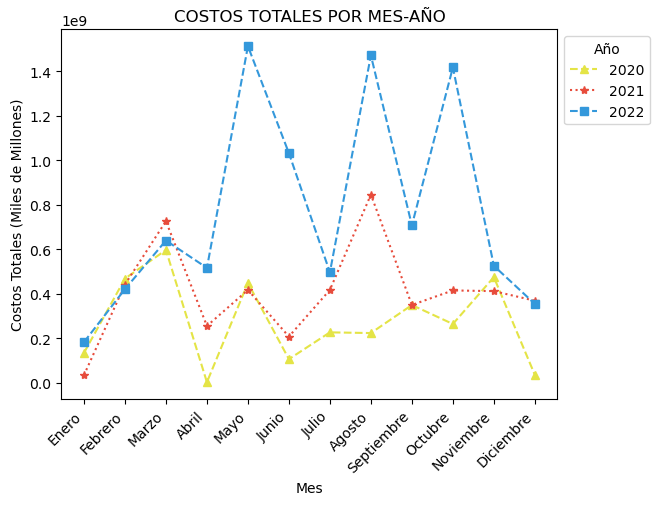

In [15]:
#Seleccionando los valores
data_grafica_2020 = data_2020[["MES","VALOR TOTAL"]].groupby(
            ["MES"], as_index=False).sum(
            ).sort_values(by=["MES"], ascending=True)[0:20]

data_grafica_2021 = data_2021[["MES","VALOR TOTAL"]].groupby(
            ["MES"], as_index=False).sum(
            ).sort_values(by=["MES"], ascending=True)

data_grafica_2022 = data_2022[["MES","VALOR TOTAL"]].groupby(
            ["MES"], as_index=False).sum(
            ).sort_values(by=["MES"], ascending=True)[0:20]

#data_grafica

#Graficando
fig, ax = plt.subplots()

ax.plot(data_grafica_2020["MES"], data_grafica_2020["VALOR TOTAL"], marker = '^', linestyle = 'dashed', color="#E4E446", label="2020")
ax.plot(data_grafica_2021["MES"], data_grafica_2021["VALOR TOTAL"], marker = '*', linestyle = 'dotted', color="#E74C3C", label="2021")
ax.plot(data_grafica_2022["MES"], data_grafica_2022["VALOR TOTAL"], marker = 's', linestyle = '--', color = "#3498DB", label="2022")
plt.xticks(range(1,13),["Enero","Febrero","Marzo","Abril","Mayo","Junio",
            "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"], rotation=45,ha="right")
plt.xlabel("Mes")
plt.ylabel("Costos Totales (Miles de Millones)")
plt.title("COSTOS TOTALES POR MES-AÑO")
plt.legend(title="Año", bbox_to_anchor=(1.2, 1.0))
plt.show()

## OBSERVACIONES
* Se pueden ver costos superiores en el año 2022, seguidos del año 2021 y 2020 correspondientemente. Los costos para el año 2022 tienen un incremento considerable en los meses de Mayo, Junio, Agosto y Octubre en comparacion a los dos años en comparación. Asi mismo, para el año 2021, se tienen picos de costos en los meses de Marzo y agosto en comparacion a los demás meses del mismo año respectivamente. Sin embargo, se debe tener en cuenta que los costos pueden expresarsen en cantidades mas altas debido a fenomenos como la inflación del dinero.

------------

# Atributos mas representativos segun: VALORES TOTALES

Las graficas correspondientes se obtuvieron de agrupar y ordenar segun cada atributo de acuerdo a los costos relacionados de si mismos obteniendo asi las categorias con mayores costos representativos segun cada atributo.

## USUARIOS CON MAS ACTIVIDAD SEGUN: VALOR TOTAL

[]

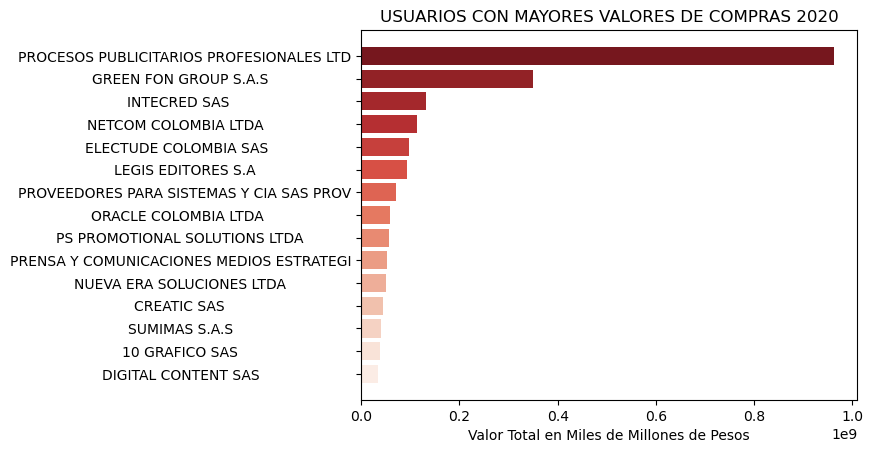

In [32]:
#Seleccionando los valores
datos=15 #Numero de valores a mostrar en el grafico
data_grafica = data_fecha[["NOMBRE","VALOR TOTAL"]].groupby(
            ["NOMBRE"], as_index=False).sum(
            ).sort_values(by=["VALOR TOTAL"], ascending=False)[0:datos] #Tomando los primeros 20 datos

#Creando la grafica
sns.barplot(y = "NOMBRE", x = "VALOR TOTAL", data = data_grafica, orient='h',) #Creando la grafica
sns.set_palette("Reds_r", datos) #Colores de las barras
plt.xlabel("Valor Total en Miles de Millones de Pesos") #Etiqueta eje x
plt.ylabel(None)
plt.title(f"USUARIOS CON MAYORES VALORES DE COMPRAS {año}")
plt.plot()

# DESCRIPCION
* PROCESOS PUBLICITARIOS PROFESIONALES LTD esel proveedor con costos aproximados a los mil millones de Pesos durante el 2020 seguido por GREEN FON GROUP con aproximadamente 400 Millones de pesos. Si bien los demas proveedores aportan, no se comparan con estos dos anteriores ya que no llegan ni a una quinta parte del costo del proveedor mas representativo. Los demás proveedores tienen valores similares y estabilizados; No se ven costos anomalos para estas categorias.

## USUARIOS POR NIT CON MAS ACTIVIDAD

[]

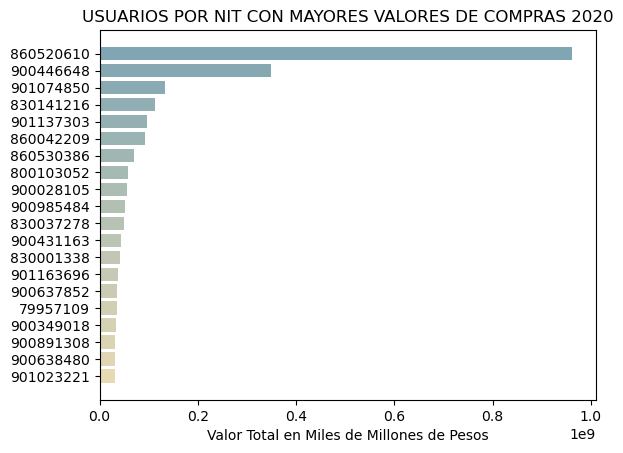

In [34]:
#Seleccionando los datos
data_grafica = data_fecha[["NIT","VALOR TOTAL"]].groupby(
            ["NIT"], as_index=False).sum(
            ).sort_values(by=["VALOR TOTAL"], ascending=False)[0:20]

sns.barplot(y = "NIT", x = "VALOR TOTAL", data = data_grafica, orient='h',
           order=data_grafica.sort_values('VALOR TOTAL', ascending=False).NIT)
sns.set_palette(palette = sns.color_palette("blend:#7AB,#EDA",20))
plt.xlabel("Valor Total en Miles de Millones de Pesos")
plt.ylabel(None)
plt.title(f"USUARIOS POR NIT CON MAYORES VALORES DE COMPRAS {año}")
plt.plot()

# DESCRIPCION
* Para efectos legales se representa la misma informacion de la grafica anterior pero referenciando a cada proveedor de acuerdo a su NIT.

## CENTROS DE COSTOS CON MAYOR ACTIVIDAD

[]

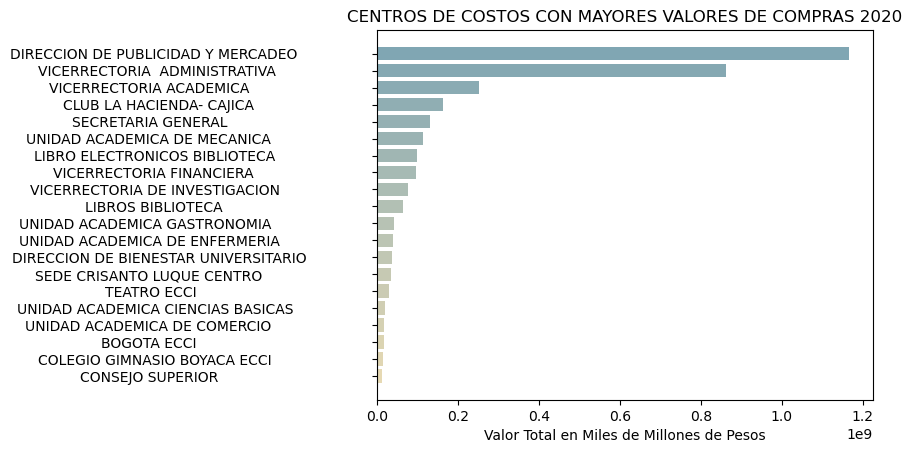

In [35]:
#Seleccionando los valores
data_grafica = data_fecha[["CENTRO DE COSTOS","VALOR TOTAL"]].groupby(
            ["CENTRO DE COSTOS"], as_index=False).sum(
            ).sort_values(by=["VALOR TOTAL"], ascending=False)[0:20] #Tomando los primeros 20 datos

#Creando la grafica
sns.barplot(y = "CENTRO DE COSTOS", x = "VALOR TOTAL", data = data_grafica, orient='h') #Creando la grafica
sns.set_palette(palette = sns.color_palette("vlag",20)) #Colores de las barras
plt.xlabel("Valor Total en Miles de Millones de Pesos") #Etiqueta eje x
plt.ylabel(None)
plt.title(f"CENTROS DE COSTOS CON MAYORES VALORES DE COMPRAS {año}")
plt.plot()

# DESCRIPCION
* Los 3 Centros de Costos mas representativos asociados al gasto son La Direccion de publicidad y mercadeo, Vicerectoria administrativa y Academica con un valor total de aproximadamente 2.200 millones de Pesos. Los demás centros de coostos mantienen valores aproximado que no superan cada uno los 200 millones de pesos.

## Productos Mas Requeridos por Valor total

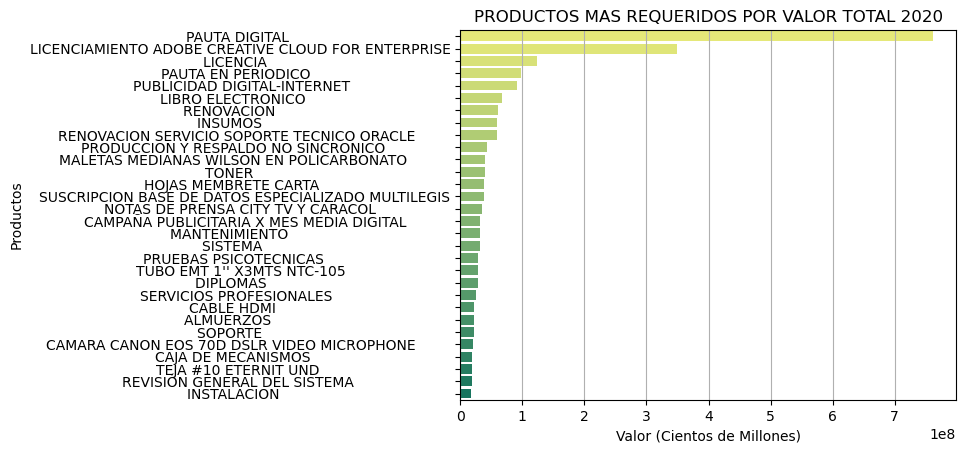

In [131]:
#Seleccionando datos
nro_datos=30
data_grafica = data_fecha[["DESCRIPCION","VALOR TOTAL"]].groupby(
            ["DESCRIPCION"], as_index=False).sum( #Count para contar las veces que aparece en los datos
            ).sort_values(by=["VALOR TOTAL"], ascending=0)[0:nro_datos]

data_grafica.columns = ["DESCRIPCION","VALOR TOTAL AGRUPADAS"]
data_grafica.head(4)

#Graficando
sns.barplot(x="VALOR TOTAL AGRUPADAS", y="DESCRIPCION", data=data_grafica)
plt.title(f"PRODUCTOS MAS REQUERIDOS POR VALOR TOTAL {año}")
sns.set_palette("summer_r",nro_datos)
plt.xlabel("Valor (Cientos de Millones)")
plt.ylabel("Productos")
plt.grid(axis="x")
plt.gridas_index=False

# DESCRIPCION
* En la imagen se pueden ver los productos mas requeridos en el 2020 segun su descripción y los costos más altos registrados en la base de datos sin embargo, esta informacion puede ser engañosa ya que las descripciones de los productos se pueden realizar de diferentes maneras según la persona que lo registre es por ello, que cuando se agrupan los valores puede que se discriminen 2 o mas categorias que referencian un mismo producto, por lo que no se estaria agrupando en 2 categorias diferentes mas no en una única.

## COMPROBANTES POR VALOR TOTAL

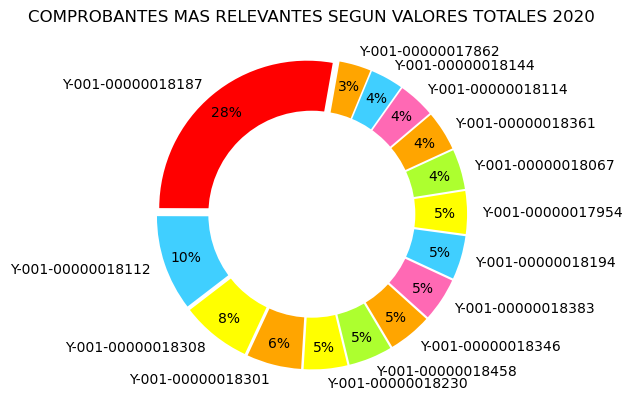

In [106]:
#Seleccionando los valores
datos=15 #Numero de valores a mostrar en el grafico

comprobantes = data_fecha[["COMPROBANTE","VALOR TOTAL"]].groupby(
            ["COMPROBANTE"], as_index=False).sum(
            ).sort_values(by=["VALOR TOTAL"], ascending=False)[0:datos] #Tomando los primeros 20 datos

#Grafica de torta

##GRAFICO DE ANILLOS
colors = ['#FF0000', '#40cfff', '#FFFF00','#FFA500',"#FFFF00", 
          '#ADFF2F', '#FFA500', '#ff69b4', '#40cfff', '#FFFF00',
         '#ADFF2F', '#FFA500', '#ff69b4', '#40cfff', '#FFA500',
         '#ADFF2F', '#40cfff', '#ff69b4', '#FFFF00', '#FFA500']

explode = (0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05)

colors=colors[0:datos]
explode=explode[0:datos]


frecuencias = comprobantes["VALOR TOTAL"] 
etiquetas = comprobantes["COMPROBANTE"] 

#Configuraciones
counts=frecuencias

# Grafico de Pastel
plt.pie(frecuencias, colors=colors, labels=etiquetas,
        autopct='%1.f%%', pctdistance=0.85,
        explode=explode,labeldistance=1.1, startangle=80)

# Agregando el circulo Blanco en la Mitad
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title(f'COMPROBANTES MAS RELEVANTES SEGUN VALORES TOTALES {año}')
plt.show()

# DESCRIPCION
* Se obtienen los comprantes mas relevantes segun sus valores totales. Estos corresponden de igual manera a los productos mas solicitados por valor Total ya que varios comprobantes pueden hacer referencia a un mismo producto

## NUBE DE PALABRAS
## PRODUCTOS MAS SOLICITADOS SEGUN: VALORES TOTALES MAS RELEVANTES

In [21]:
data_nube = data_fecha[["NOMBRE","VALOR TOTAL"]].groupby( #Revisar el ao para cada nube generada
            ["NOMBRE"], as_index=False).sum(
            ).sort_values(by=["VALOR TOTAL"], ascending=False)[0:20] #Seleccionando los 20 registros mas relevantes

mas_relevantes = data_nube["NOMBRE"]
mas_relevantes = data[data["NOMBRE"].isin(mas_relevantes)] #Extrayendo los valores de las clientes mas relevantes
grafica = mas_relevantes[["NOMBRE", "DESCRIPCION" ,"VALOR TOTAL"]]
#grafica

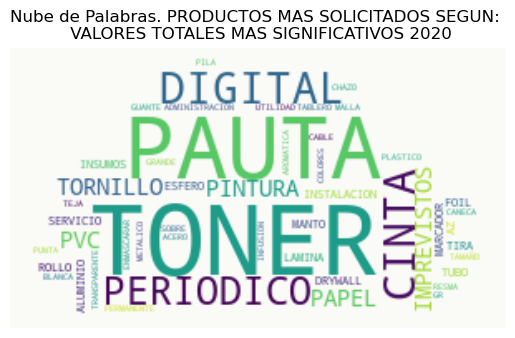

In [113]:
mask = np.array(Image.open("nube de palabras.png")) #Silueta de nube
mask[mask == 1] = 255

#Texto a Analizar
text = " ".join(item for item in grafica.DESCRIPCION)

#Creando la nube
palabras_excluidas=["X", "DE", "EN","CON","Y","PARA","UND","LIQUIDO","Varios","PULG","NEGRO",
                   "HP","OFICIO","CARTA"] #Palabras a excluir #IMPORTANTE
word_cloud = WordCloud(collocations = False, background_color="#FAFAF7", max_words=50, stopwords = palabras_excluidas,
                      mask=mask, repeat=True).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.title(f"Nube de Palabras. PRODUCTOS MAS SOLICITADOS SEGUN: \n VALORES TOTALES MAS SIGNIFICATIVOS {año}")
plt.axis("off")
plt.show()

# DESCRIPCION
* Se presentan los diferentes productos que tienen relevancia economica y que son los mas solicitados a lo largo del tiempo

----------------

----------------

# GRAFICAS POR FRECUECUENCIAS
* Para estas graficas el criterio base son las frecuencias de aparicion dentro de el conjunto de datos mas no los valores totales mas altos como en las graficas anteriores.

* Estos gastos se pueden interpretar como gastos hormigas que aunque no generan un impacto economico significativo individualmente, juntos alo largo del tiempo pueden generar gastos considerables

## COMPROBANTES MAS FRECUENTES 2020
Estas graficas surgen a partir de las frecuencias de registro en los datos como criterio principal es decir, se grafican a partir del conteo de las veces que cierta caracteristica se registro en la base de datos.

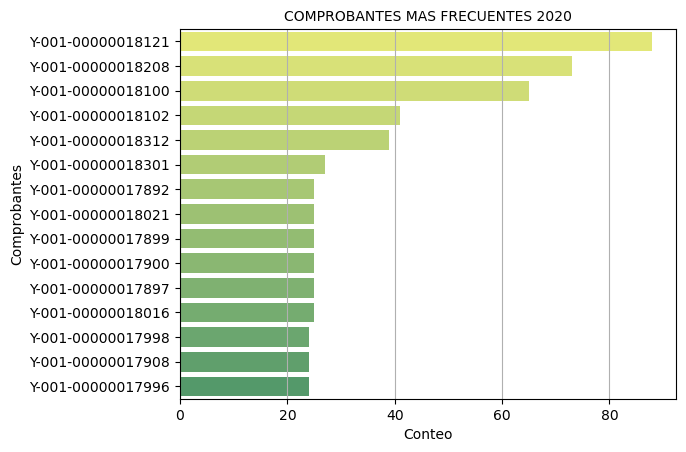

In [117]:
#Graficando barras
sns.countplot(y="COMPROBANTE", data=data_fecha, 
              order = data_fecha["COMPROBANTE"].value_counts().iloc[0:15].index)
plt.title(f"COMPROBANTES MAS FRECUENTES {año}",fontsize="10")
sns.set_palette("GnBu_r",datos)
plt.xlabel("Conteo")
plt.ylabel("Comprobantes")
plt.grid(axis="x")
plt.show()

# DESCRIPCION
Estos comprobantes pueden hacer referencia a uno o mas productos

## USUARIOS MAS FRECUENTES

# DIAGRAMA DE TORTA

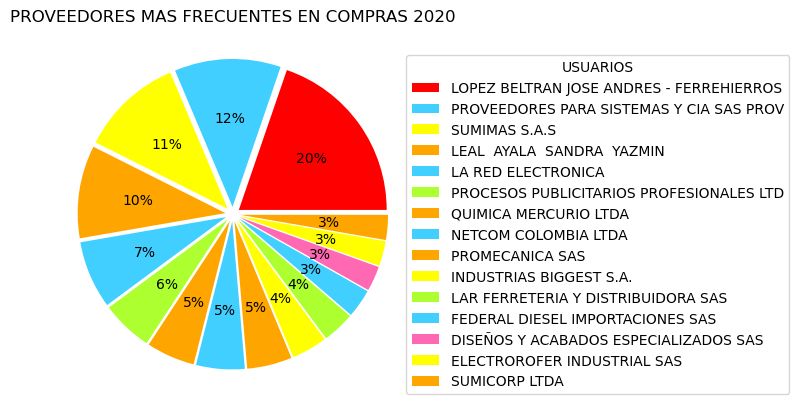

In [119]:
#Seleccionando los datos
datos=15
data_grafica = data_fecha[["NOMBRE","VALOR TOTAL"]].groupby(
            ["NOMBRE"], as_index=False).count( #Count para contar las veces que aparece en los datos
            ).sort_values(by=["VALOR TOTAL"], ascending=False)[0:datos]
data_grafica.columns = ["NOMBRE","FRECUENCIAS"]

#GRAFICANDO 
#Datos a graficar
x_data = data_grafica["FRECUENCIAS"]
etiquetas = data_grafica["NOMBRE"]

#Configuraciones del grafico
colors = ['#FF0000', '#40cfff', '#FFFF00','#FFA500','#40cfff', 
          '#ADFF2F', '#FFA500', '#40cfff', "#FFA500", '#FFFF00',
         '#ADFF2F', '#40cfff', '#ff69b4', '#FFFF00', '#FFA500']

explode = (0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05,
          0.05, 0.05, 0.05, 0.05, 0.05)

colors = colors[:datos]
explode = explode[:datos]


#Creando el grafico
plt.pie(x_data, explode=explode,
       autopct="%1.f%%", colors= colors)
plt.legend(etiquetas, title="USUARIOS", bbox_to_anchor=(.95, .95))
plt.title(f"PROVEEDORES MAS FRECUENTES EN COMPRAS {año}")
plt.show()

# DESCRIPCION
* Se analiza que como proveedores mas frecuentes se encuentra a LOPEZ BELTRAN JOSE ANDRES FERREHIERROS con una participacion del 20%, que aunque es el mas frecuente no es el mas representativo a nivel economico por lo que el punto fuerte de estas compras es la logistica, ya que al ser varias compras se debe planear y pagar frecuentemente conceptos como el transporte.

## CENTRO DE COSTOS MAS FRECUENTES

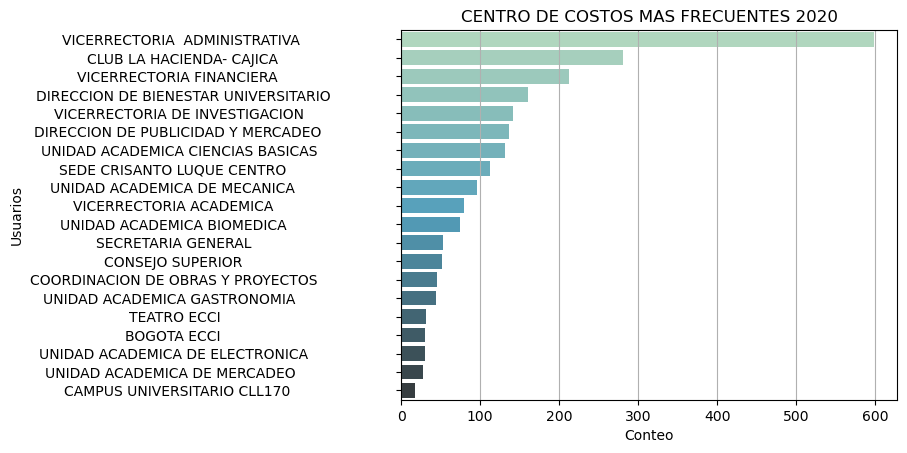

In [133]:
#Graficando barras
nro_datos = 20
sns.countplot(y="CENTRO DE COSTOS", data=data_fecha, 
              order = data_fecha["CENTRO DE COSTOS"].value_counts().iloc[0:nro_datos].index)
plt.title(f"CENTRO DE COSTOS MAS FRECUENTES {año}")
sns.set_palette("GnBu_d",nro_datos)
plt.xlabel("Conteo")
plt.ylabel("Usuarios")
plt.grid(axis="x")
plt.show()

# DESCRIPCION
* Dentro de las centros de compras mas frecuentes se tiene en primer lugar a LA VICERECTORIA ADMINISTRATIVA la cual ocupa de la misma manera el 2 puesto en centros de costos con valores totales relevante por lo que esta dependencia se debe supervisar a partir de que se esta pidiendo y por cuanto valor, ya que es un centro influyente dentro de las transacciones.

## PRODUCTOS MAS FRECUENTES

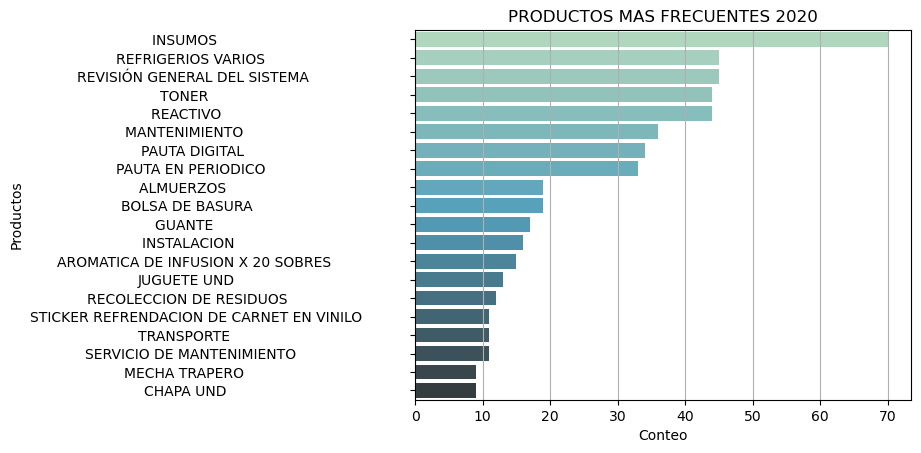

In [123]:
#Graficando barras
nro_datos = 20
sns.countplot(y="DESCRIPCION", data=data_fecha, 
              order = data_fecha["DESCRIPCION"].value_counts().iloc[0:nro_datos].index)
plt.title(f"PRODUCTOS MAS FRECUENTES {año}")
sns.set_palette("summer_r",nro_datos)
plt.xlabel("Conteo")
plt.ylabel("Productos")
plt.grid(axis="x")
plt.show()

# DESCRIPCION
Dentro de los productos mas frecuentes encontramos Insumos, refrigerios entre otros, los cuales a nicel economico no son muy relevantes pero a nivel de pedidos si lo son, es por ello que se debe revisar si algunos parametros de logistica estan causando costos adicionales al tener tanta demanda.

## Productos por cantidades

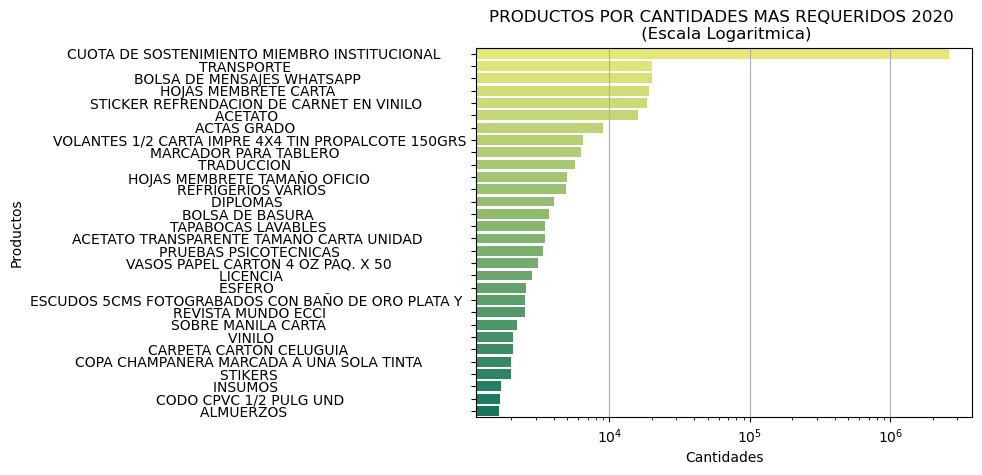

In [130]:
#Seleccionando datos
nro_datos=30
data_grafica = data_fecha[["DESCRIPCION","CANTIDAD"]].groupby(
            ["DESCRIPCION"], as_index=False).sum( #Count para contar las veces que aparece en los datos
            ).sort_values(by=["CANTIDAD"], ascending=0)[0:nro_datos]

data_grafica.columns = ["DESCRIPCION","CANTIDADES AGRUPADAS"]
data_grafica.head(4)

#Graficando
sns.barplot(x="CANTIDADES AGRUPADAS", y="DESCRIPCION", data=data_grafica)
plt.title(f"PRODUCTOS POR CANTIDADES MAS REQUERIDOS {año} \n (Escala Logaritmica)")
plt.xscale("log")
sns.set_palette("summer_r",nro_datos)
plt.xlabel("Cantidades")
plt.ylabel("Productos")
plt.grid(axis="x")
plt.show()

# DESCRIPCION
Los datos presentados se grafican a partir de las unidades adquiridas durante el año analizado. Se deben revisar los productos con mayores cantidades y asociarles al precio que se esta pagando por ello

## NUBE DE PALABRAS, PRODUCTOS POR DESCRIPCION MAS FRECUENTES

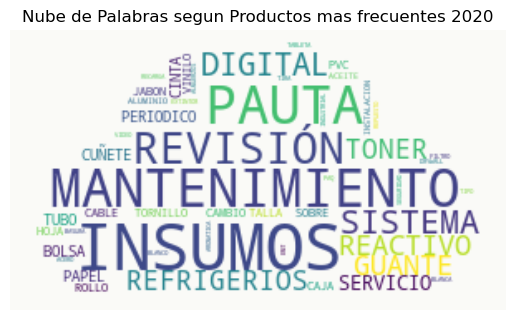

In [128]:
#Mascara de forma
mask = np.array(Image.open("nube de palabras.png")) #Silueta de nube
mask[mask == 1] = 255

#Texto a Analizar
text = " ".join(item for item in data_fecha.DESCRIPCION)

#Creando la nube
palabras_excluidas=["X", "DE", "EN","CON","Y","PARA","UND","LIQUIDO","Varios","PULG","NEGRO",
                   "HP","OFICIO","CARTA","AL","DEL","GENERAL"] #Palabras a excluir #IMPORTANTE

word_cloud = WordCloud(collocations = False, background_color="#FAFAF7", max_words=50, stopwords = palabras_excluidas,
                      mask=mask, repeat=True).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation="bilinear")
plt.title(f"Nube de Palabras segun Productos mas frecuentes {año}")
plt.axis("off")
plt.show()

# DESCRIPCION
Las palabras presentadas corresponden a los productos que mas pedidos se solicitan dentro en las compras registradas.